# PIMA INDIAN DIABETES Model
In this notebook, I have applied the machine learning model to predict which patients diagnosed to be diabetic or not.

# About Dataset

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Following steps I have taken to apply machine learning models:<br>
- Importing Essential Libraries.
- Data Preparation & Data Cleaning.
- Data Visualization (already done in early_Diabetes_Prediction_EDA.ipynb)
- Feature Engineering to discover essential features in the process of applying machine learning.
- Encoding Categorical Variables.
- Train Test Split
- Apply Machine Learning Algorithm 
- Cross Validation
- Model Evaluation

# Importing Libraries

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn import model_selection
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC 

In [3]:
df=pd.read_csv('diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


# Data Cleaning & Data Preparation

In this step we will find missing entries, if there then fill them with median or mean values, checking data types of all the features to find any inconsistency.

In [6]:
df.isna().any() # No NAs

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [7]:
print(df.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [8]:
df.head(50)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


It seems from the above table that there are zero entries in BMI, Blood Pressure,Glucose, Skin Thickness and Insulin which are meaningless so we will fill it with their median values before fitting it into the machine learning models.

** Replacing zero entries BMI, Blood Pressure,Glucose, Skin Thickness and Insulin with their median values **

In [9]:
# Calculate the median value for BMI
median_bmi = df['BMI'].median()
# Substitute it in the BMI column of the
# dataset where values are 0
df['BMI'] = df['BMI'].replace(
    to_replace=0, value=median_bmi)

median_bloodp = df['BloodPressure'].median()
# Substitute it in the BloodP column of the
# dataset where values are 0
df['BloodPressure'] = df['BloodPressure'].replace(
    to_replace=0, value=median_bloodp)

# Calculate the median value for PlGlcConc
median_plglcconc = df['Glucose'].median()
# Substitute it in the PlGlcConc column of the
# dataset where values are 0
df['Glucose'] = df['Glucose'].replace(
    to_replace=0, value=median_plglcconc)

# Calculate the median value for SkinThick
median_skinthick = df['SkinThickness'].median()
# Substitute it in the SkinThick column of the
# dataset where values are 0
df['SkinThickness'] = df['SkinThickness'].replace(
    to_replace=0, value=median_skinthick)

# Calculate the median value for SkinThick
median_skinthick = df['Insulin'].median()
# Substitute it in the SkinThick column of the
# dataset where values are 0
df['Insulin'] = df['Insulin'].replace(
    to_replace=0, value=median_skinthick)

# Feature Engineering
Now, its time to add important features to the dataset discover some effective features before fitting it into machine learning models.

**Feature 1 : BMI Indicator**<br>
I m adding BMI Indicator feature as we know :
If you have a BMI of:
- Under 18.5 – you are considered underweight and possibly malnourished.
- 18.5 to 24.9 – you are within a healthy weight range for young and middle-aged adults.
- 25.0 to 29.9 – you are considered overweight.
- Over 30 – you are considered obese.

In [11]:
def set_bmi(row):
    if row["BMI"] < 18.5:
        return "Under"
    elif row["BMI"] >= 18.5 and row["BMI"] <= 24.9:
        return "Healthy"
    elif row["BMI"] >= 25 and row["BMI"] <= 29.9:
        return "Over"
    elif row["BMI"] >= 30:
        return "Obese"

In [12]:
df = df.assign(BM_DESC=df.apply(set_bmi, axis=1))

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BM_DESC
0,6,148,72,35,30.5,33.6,0.627,50,1,Obese
1,1,85,66,29,30.5,26.6,0.351,31,0,Over
2,8,183,64,23,30.5,23.3,0.672,32,1,Healthy
3,1,89,66,23,94.0,28.1,0.167,21,0,Over
4,0,137,40,35,168.0,43.1,2.288,33,1,Obese


**Feature 2: Insulin Indicative Range** <br>
If insulin level (2-Hour serum insulin (mu U/ml)) is >= 16 and <= 166, then it is normal range
else it is considered as Abnormal

In [13]:
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

In [14]:
df = df.assign(INSULIN_DESC=df.apply(set_insulin, axis=1))

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BM_DESC,INSULIN_DESC
0,6,148,72,35,30.5,33.6,0.627,50,1,Obese,Normal
1,1,85,66,29,30.5,26.6,0.351,31,0,Over,Normal
2,8,183,64,23,30.5,23.3,0.672,32,1,Healthy,Normal
3,1,89,66,23,94.0,28.1,0.167,21,0,Over,Normal
4,0,137,40,35,168.0,43.1,2.288,33,1,Obese,Abnormal


# Label Encoding
In this step we will encode the categorical variables BM_DESC,INSULIN_DESC into numerical values before fitting it into machine learning models.

In [15]:
df["INSULIN_DESC"] = df.INSULIN_DESC.apply(lambda  x:1 if x=="Normal" else 0)

**Segregating Features and Target Variable**<br>

I have taken X as Feature variable and y as target variable.

In [16]:
X=pd.get_dummies(df,drop_first=True)
X=X.drop(['Outcome'],axis=1)
y = df['Outcome']

In [17]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,INSULIN_DESC,BM_DESC_Obese,BM_DESC_Over,BM_DESC_Under
0,6,148,72,35,30.5,33.6,0.627,50,1,1,0,0
1,1,85,66,29,30.5,26.6,0.351,31,1,0,1,0
2,8,183,64,23,30.5,23.3,0.672,32,1,0,0,0
3,1,89,66,23,94.0,28.1,0.167,21,1,0,1,0
4,0,137,40,35,168.0,43.1,2.288,33,0,1,0,0


In [18]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# Splitting Data into Training & Testing set

The training dataset and test dataset must be similar, usually have the same predictors or variables. They differ on the observations and specific values in the variables. If you fit the model on the training dataset, then you implicitly minimize error or find correct responses. The fitted model provides a good prediction on the training dataset. Then you test the model on the test dataset. If the model predicts good also on the test dataset, you have more confidence. You have more confidence since the test dataset is similar to the training dataset, but not the same nor seen by the model. It means the model transfers prediction or learning in real sense.

So,by splitting dataset into training and testing subset, we can efficiently measure our trained model since it never sees testing data before.Thus it's possible to prevent overfitting.

I am just splitting dataset into 20% of test data and remaining 80% will used for training the model.

I have used stratify parameter.This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

In [21]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,stratify=y, random_state = 1234)

# Feature Scaling

In [22]:

sc_X = StandardScaler()
X_train_scaled = pd.DataFrame(sc_X.fit_transform(X_train))
X_test_scaled = pd.DataFrame(sc_X.transform(X_test))


# Applying Machine learning Models

In [23]:

logi = LogisticRegression(random_state = 0, penalty = 'l1')
logi.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_scaled, y_train, verbose=True)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [25]:
random_forest = RandomForestClassifier(n_estimators = 100,criterion='gini', random_state = 47)
random_forest.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=47, verbose=0, warm_start=False)

In [31]:
svc_model_l = SVC(kernel='linear',probability=True)
svc_model_l.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [32]:
svc_model_r = SVC(kernel='rbf',probability=True)
svc_model_r.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [40]:
random_forest_e = RandomForestClassifier(n_estimators = 100,criterion='entropy', random_state = 47)
random_forest_e.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=47, verbose=0, warm_start=False)

# Cross Validation

In [41]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'

acc_logi = cross_val_score(estimator = logi, X = X_train_scaled, y = y_train, cv = kfold,scoring=scoring)
acc_logi.mean()

acc_xgb = cross_val_score(estimator = xgb_classifier, X = X_train_scaled, y = y_train, cv = kfold,scoring=scoring)
acc_xgb.mean()

acc_rand = cross_val_score(estimator = random_forest, X = X_train_scaled, y = y_train, cv = kfold, scoring=scoring)
acc_rand.mean()

acc_rande = cross_val_score(estimator = random_forest_e, X = X_train_scaled, y = y_train, cv = kfold, scoring=scoring)
acc_rande.mean()

acc_svc_l = cross_val_score(estimator = svc_model_l, X = X_train_scaled, y = y_train, cv = kfold,scoring=scoring)
acc_svc_l.mean()

acc_svc_r = cross_val_score(estimator = svc_model_r, X = X_train_scaled, y = y_train, cv = kfold,scoring=scoring)
acc_svc_r.mean()

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in fu

0.7508196721311475

# Model Evaluation
In this step we will compare different performance metric such as cross validation accuracy, Precision,Recall,F1 Score, ROC etc.

In [43]:
y_predict_logi = logi.predict(X_test_scaled)
acc= accuracy_score(y_test, y_predict_logi)
roc=roc_auc_score(y_test, y_predict_logi)
prec = precision_score(y_test, y_predict_logi)
rec = recall_score(y_test, y_predict_logi)
f1 = f1_score(y_test, y_predict_logi)

results = pd.DataFrame([['Logistic Regression',acc, acc_logi.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.811688,0.74762,0.804878,0.611111,0.694737,0.765556


In [44]:
y_predict_x = xgb_classifier.predict(X_test_scaled)
roc=roc_auc_score(y_test, y_predict_x)
acc = accuracy_score(y_test, y_predict_x)
prec = precision_score(y_test, y_predict_x)
rec = recall_score(y_test, y_predict_x)
f1 = f1_score(y_test, y_predict_x)

model_results = pd.DataFrame([['XG Boost',acc, acc_xgb.mean(),prec,rec, f1,roc]],
               columns = ['Model','Accuracy', 'Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.811688,0.747620,0.804878,0.611111,0.694737,0.765556
1,XG Boost,0.727273,0.760629,0.620000,0.574074,0.596154,0.692037


In [45]:
y_predict_r = random_forest.predict(X_test_scaled)
roc=roc_auc_score(y_test, y_predict_r)
acc = accuracy_score(y_test, y_predict_r)
prec = precision_score(y_test, y_predict_r)
rec = recall_score(y_test, y_predict_r)
f1 = f1_score(y_test, y_predict_r)

model_results = pd.DataFrame([['Random Forest',acc, acc_rand.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.811688,0.747620,0.804878,0.611111,0.694737,0.765556
1,XG Boost,0.727273,0.760629,0.620000,0.574074,0.596154,0.692037
2,Random Forest,0.753247,0.754045,0.666667,0.592593,0.627451,0.716296


In [46]:
y_predict_s = svc_model_l.predict(X_test_scaled)
roc=roc_auc_score(y_test, y_predict_s)
acc = accuracy_score(y_test, y_predict_s)
prec = precision_score(y_test, y_predict_s)
rec = recall_score(y_test, y_predict_s)
f1 = f1_score(y_test, y_predict_s)

model_results = pd.DataFrame([['SVC Linear',acc, acc_svc_l.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.811688,0.747620,0.804878,0.611111,0.694737,0.765556
1,XG Boost,0.727273,0.760629,0.620000,0.574074,0.596154,0.692037
2,Random Forest,0.753247,0.754045,0.666667,0.592593,0.627451,0.716296
3,SVC Linear,0.811688,0.746060,0.804878,0.611111,0.694737,0.765556


In [47]:
y_predict_s1 = svc_model_r.predict(X_test_scaled)
roc=roc_auc_score(y_test, y_predict_s1)
acc = accuracy_score(y_test, y_predict_s1)
prec = precision_score(y_test, y_predict_s1)
rec = recall_score(y_test, y_predict_s1)
f1 = f1_score(y_test, y_predict_s1)

model_results = pd.DataFrame([['SVC RBF',acc, acc_svc_r.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.811688,0.747620,0.804878,0.611111,0.694737,0.765556
1,XG Boost,0.727273,0.760629,0.620000,0.574074,0.596154,0.692037
2,Random Forest,0.753247,0.754045,0.666667,0.592593,0.627451,0.716296
3,SVC Linear,0.811688,0.746060,0.804878,0.611111,0.694737,0.765556
4,SVC RBF,0.785714,0.750820,0.769231,0.555556,0.645161,0.732778


In [48]:
y_predict_re = random_forest_e.predict(X_test_scaled)
roc=roc_auc_score(y_test, y_predict_re)
acc = accuracy_score(y_test, y_predict_re)
prec = precision_score(y_test, y_predict_re)
rec = recall_score(y_test, y_predict_re)
f1 = f1_score(y_test, y_predict_re)

model_results = pd.DataFrame([['Random Forest Entropy',acc, acc_rande.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.811688,0.747620,0.804878,0.611111,0.694737,0.765556
1,XG Boost,0.727273,0.760629,0.620000,0.574074,0.596154,0.692037
2,Random Forest,0.753247,0.754045,0.666667,0.592593,0.627451,0.716296
3,SVC Linear,0.811688,0.746060,0.804878,0.611111,0.694737,0.765556
4,SVC RBF,0.785714,0.750820,0.769231,0.555556,0.645161,0.732778
5,Random Forest Entropy,0.727273,0.758858,0.625000,0.555556,0.588235,0.687778


# Plotting ROC Curve

AUC(Area Under Curve) - ROC (Receiver Operating Characterstics) curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between patients with disease and no disease.

The ROC curve is plotted with TPR(True Positive Rate) against the FPR (False Positive Rate) where TPR is on y-axis and FPR is on the x-axis.

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


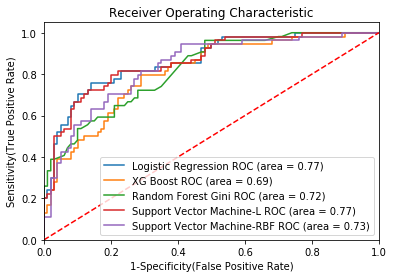

In [53]:
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(random_state = 0, penalty = 'l1'),
},
{
    'label': 'XG Boost',
    'model': XGBClassifier(),
},
    {
    'label': 'Random Forest Gini',
    'model': RandomForestClassifier(n_estimators = 100,criterion='gini', random_state = 47),
},
    {
    'label': 'Support Vector Machine-L',
    'model': SVC(kernel='linear',probability=True)} ,
        {
    'label': 'Support Vector Machine-RBF',
    'model': SVC(kernel='rbf',probability=True) ,
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train_scaled, y_train) # train the model
    y_pred=model.predict(X_test_scaled) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test_scaled)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test_scaled))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix

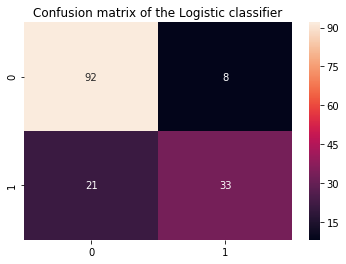

In [58]:
cm_logi = confusion_matrix(y_test, y_predict_logi)
plt.title('Confusion matrix of the Logistic classifier')
sns.heatmap(cm_logi,annot=True,fmt="d")
plt.show()

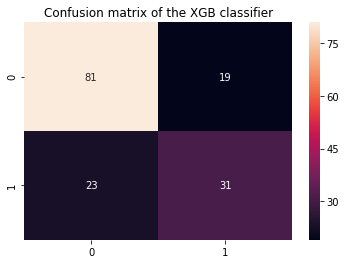

In [59]:
cm_x = confusion_matrix(y_test, y_predict_x)
plt.title('Confusion matrix of the XGB classifier')
sns.heatmap(cm_x,annot=True,fmt="d")
plt.show()

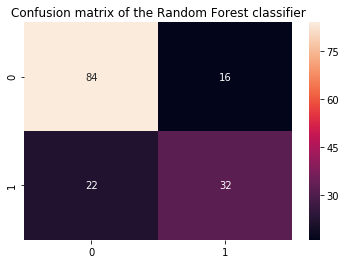

In [60]:
cm_r = confusion_matrix(y_test, y_predict_r)
plt.title('Confusion matrix of the Random Forest classifier')
sns.heatmap(cm_r,annot=True,fmt="d")
plt.show()

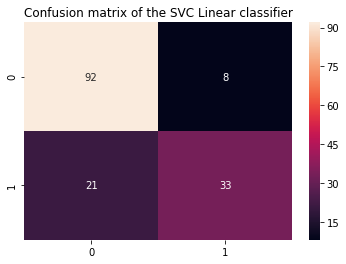

In [61]:
cm = confusion_matrix(y_test, y_predict_s)
plt.title('Confusion matrix of the SVC Linear classifier')
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

As we have seen from the above model evaluation, Logistic Regression and SVC Linear are best model for this dataset.
so we will perform further Model evaluation of Logistic Regression.

# Model Evaluation Part 2

In this part we will further find Classification error,sensitivity and specifitivity of our logistic regression model.

In [62]:
TP = cm_logi[1, 1]
TN = cm_logi[0, 0]
FP = cm_logi[0, 1]
FN = cm_logi[1, 0]

In [63]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)


0.18831168831168832


The model has 18.83% of classification error.

In [64]:
sensitivity = TP / float(FN + TP)

print(sensitivity)

0.6111111111111112


In [65]:
specificity = TN / (TN + FP)

print(specificity)

0.92


The model is highly specific and less sensitive model.

In [68]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)


0.08


Our model has 8% false positive rate